In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score


In [5]:
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<Axes: ylabel='target'>

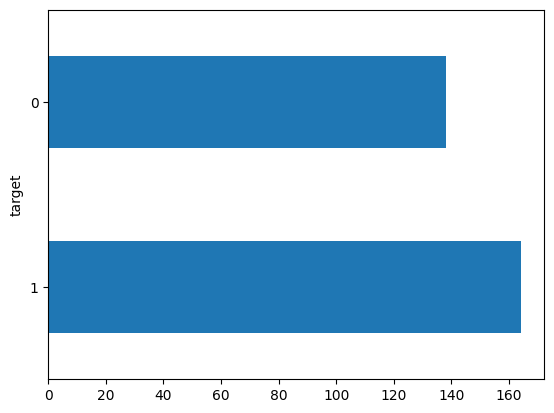

In [12]:
df.target.value_counts().plot.barh()

<Axes: ylabel='count'>

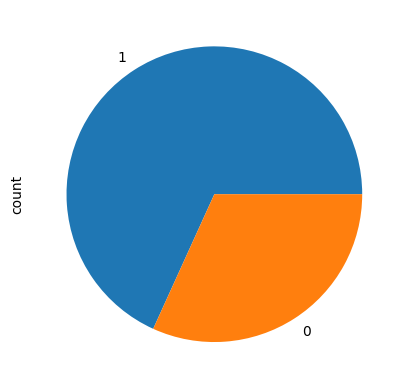

In [13]:
df.sex.value_counts().plot.pie()

In [17]:
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
baseM=DecisionTreeClassifier()


In [21]:
BaggingModel=BaggingClassifier(
   estimator=baseM,
    n_estimators=50,
    max_samples=0.8,
    bootstrap=True,
    random_state=42
)
BaggingModel.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=50, random_state=42)

In [24]:
y_predict=BaggingModel.predict(X_test)
print('Accuracy score:',accuracy_score(y_test,y_predict))
print('Precision:',precision_score(y_test,y_predict))

Accuracy score: 0.8524590163934426
Precision: 0.896551724137931
